In [33]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
FILE="crime.csv"

In [36]:
dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

d = pd.read_csv(FILE,
  header=0,names=['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code',  'Police_Districts', 'Month', 'Lon',
       'Lat'],dtype={'Dc_Dist':str,'Psa':str,
                'Dispatch_Date_Time':str,'Dispatch_Date':str,'Dispatch_Time':str,
                  'Hour':str,'Dc_Key':str,'Location_Block':str,
                     'UCR_General':str,'Text_General_Code':str,
              'Police_Districts':str,'Month':str,'Lon':str,'Lat':str},
             parse_dates=['Dispatch_Date_Time'],date_parser=dateparse)

# Fix Month to datetime Month
d['Month'] = d['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))

In [17]:
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [37]:
df.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat,Value
count,2.191142e+06,2.191142e+06,2.191142e+06,2.190771e+06,2.171594e+06,2.174128e+06,2.174128e+06,2191142.0
mean,1.725813e+01,1.315404e+01,2.010850e+11,1.273115e+03,1.205751e+01,-7.514989e+01,3.999199e+01,1.0
std,1.064949e+01,6.814275e+00,3.149763e+08,8.153109e+02,5.793053e+00,5.973885e-02,4.536990e-02,0.0
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01,1.0
25%,9.000000e+00,9.000000e+00,2.008150e+11,6.000000e+02,8.000000e+00,-7.518487e+01,3.995564e+01,1.0
50%,1.600000e+01,1.400000e+01,2.011020e+11,8.000000e+02,1.200000e+01,-7.515666e+01,3.999102e+01,1.0
75%,2.400000e+01,1.900000e+01,2.013260e+11,1.800000e+03,1.700000e+01,-7.511839e+01,4.002741e+01,1.0
max,9.200000e+01,2.300000e+01,2.016770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01,1.0


In [38]:
df['Text_General_Code'].unique()

array(['Other Assaults', 'All Other Offenses', 'Weapon Violations',
       'Thefts', 'Burglary Non-Residential', 'Aggravated Assault Firearm',
       'Theft from Vehicle', 'Disorderly Conduct',
       'Vandalism/Criminal Mischief', 'Arson', 'Fraud',
       'Robbery No Firearm', 'Vagrancy/Loitering', 'Motor Vehicle Theft',
       'Recovered Stolen Motor Vehicle', 'Robbery Firearm', 'Embezzlement',
       'Rape', 'DRIVING UNDER THE INFLUENCE', 'Forgery and Counterfeiting',
       'Narcotic / Drug Law Violations', 'Burglary Residential',
       'Other Sex Offenses (Not Commercialized)', 'Liquor Law Violations',
       'Aggravated Assault No Firearm', 'Homicide - Criminal',
       'Gambling Violations', 'Prostitution and Commercialized Vice',
       'Public Drunkenness', 'Receiving Stolen Property',
       'Homicide - Gross Negligence',
       'Offenses Against Family and Children', 'Homicide - Justifiable',
       nan], dtype=object)

In [39]:
# Count of 1 for each record. Nice to have a standard column name
df['Value'] = 1


# Use sum. We're summing up all  Dc_Dist
g=df.groupby(['Month','Text_General_Code'])['Value'].sum().reset_index()

g.head()

,Month,Text_General_Code,Value
0,2006-01,Aggravated Assault Firearm,277
1,2006-01,Aggravated Assault No Firearm,468
2,2006-01,All Other Offenses,4295
3,2006-01,Arson,44
4,2006-01,Burglary Non-Residential,246


## Analisando homicídio criminal

In [41]:
homicide_df = g[g['Text_General_Code'] == 'Homicide - Criminal']


In [42]:
homicide_df.head()

,Month,Text_General_Code,Value
12,2006-01,Homicide - Criminal,24
44,2006-02,Homicide - Criminal,22
75,2006-03,Homicide - Criminal,30
107,2006-04,Homicide - Criminal,33
139,2006-05,Homicide - Criminal,30


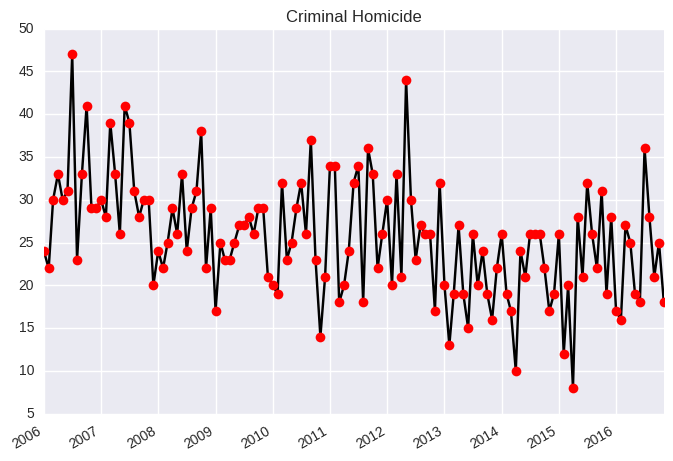

In [46]:
# Red dot with Line
fig, ax = plt.subplots()
a
ax.plot_date(homicide_df['Month'], homicide_df['Value'],'k')
ax.plot_date(homicide_df['Month'], homicide_df['Value'],'ro')
ax.set_title("Criminal Homicide")
fig.autofmt_xdate()
plt.show()